In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import csv file
dataset = pd.read_csv("iris.csv", delimiter = ',')

#Convert labels to integers
dataset["species"] = dataset["species"].map({
                    "setosa": 0,
                    "virginica": 2,
                    "versicolor": 1
                    }).astype(int)

#features
X = dataset.iloc[:,:-1].values
#labels
y = dataset["species"].values

dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
#Split data into train and test set

def split_data(X, y):
    #number of total observations
    total_obs = X.shape[0]
    test_size = (int) (total_obs*0.2) #30
    train_size = total_obs - test_size #120
    
    #generate random indices to be used to pick test set
    indices = [np.random.choice(total_obs, test_size, replace = False)]
    X_test = X[indices] #extract test set from total set
    y_test = y[indices]
    X_train = np.delete(X, indices, axis = 0)#remove test set from total set   
    y_train = np.delete(y, indices, axis = 0)
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(X, y)

In [4]:
#plotting

def plot(test_features, k_neighbours):
    
    k = k_neighbours.shape[0]
    colours = ['g.', 'r.', 'c.', 'm.', 'y.', 'k.', 'w.']
    
    for i in range(X_train.shape[0]):
        if(y_train[i] == 0):
            x = X_train[i][2]
            y = X_train[i][3]
            plt.plot(x,y, colours[0])
        elif(y_train[i] == 1):
            x = X_train[i][2]
            y = X_train[i][3]
            plt.plot(x,y, colours[1])
        else:
            x = X_train[i][2]
            y = X_train[i][3]
            plt.plot(x,y, colours[2])
    
    plt.plot(test_features[2], test_features[3], 'm^')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.show()

In [5]:
def distance(test_point, neighbour):
    '''returns distance between test_point and neighbour'''
    return np.linalg.norm(test_point-neighbour)

In [6]:
#Prediction, determined  during run time
def predict(X_test, y_test, X_train, y_train, k = 5):
    cf_matrix = np.zeros((3,3))
    rows, cols = X_train.shape
    distances = np.zeros((rows, 1)).flatten()
    
    for test_index, test_obs in enumerate(X_test):
        #Calculate and store distances between test point and all other point
        for obs_index, observation in enumerate(X_train):
            distances[obs_index] = distance(test_obs, observation)
        indices = (np.argpartition(distances, k))[:k] #get the positions of the k least distances
        k_neighbours = X_train[indices] #get the neighbours
        neighbour_labels = y_train[indices]
        prediction = np.bincount(neighbour_labels).argmax()
        plot(test_obs, k_neighbours)
        test_label = y_test[test_index]
        cf_matrix[test_label][prediction] += 1
        #update confusion matrix
        print("Predicted: {0}. Actual: {1}".format(prediction, test_label))
    return cf_matrix

Test point is drawn using a triangle


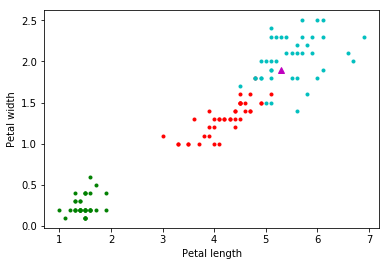

Predicted: 2. Actual: 2


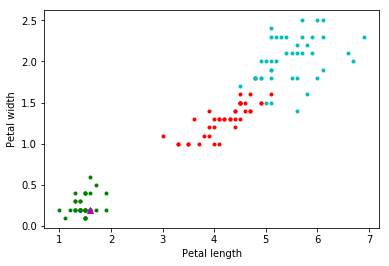

Predicted: 0. Actual: 0


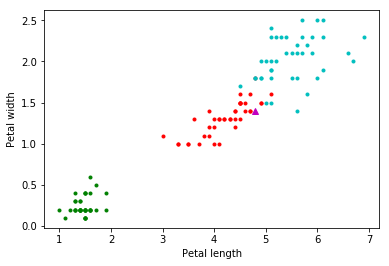

Predicted: 1. Actual: 1


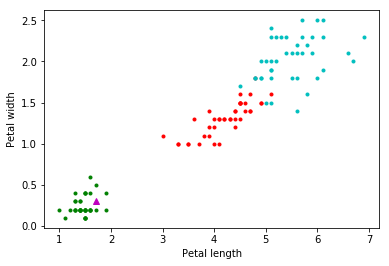

Predicted: 0. Actual: 0


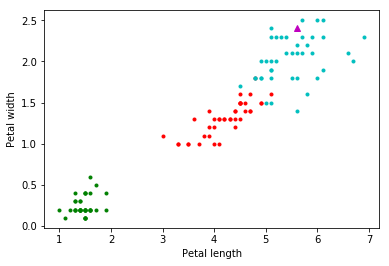

Predicted: 2. Actual: 2


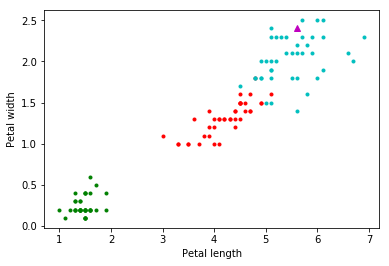

Predicted: 2. Actual: 2


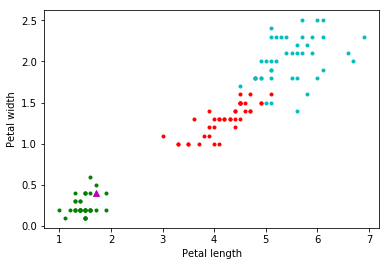

Predicted: 0. Actual: 0


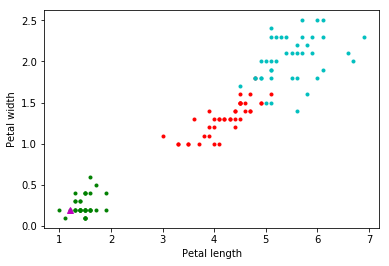

Predicted: 0. Actual: 0


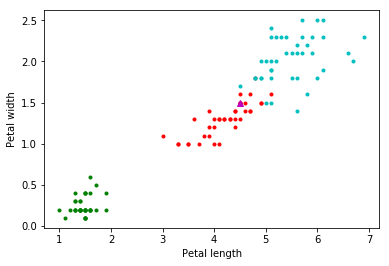

Predicted: 1. Actual: 1


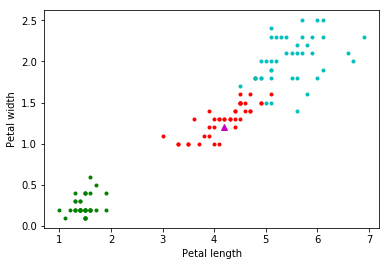

Predicted: 1. Actual: 1


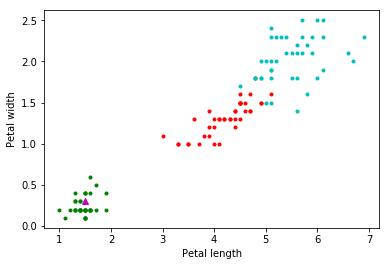

Predicted: 0. Actual: 0


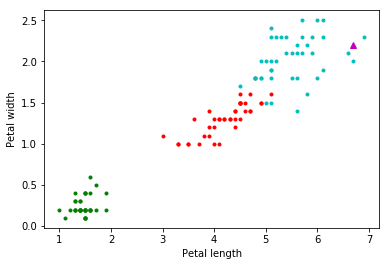

Predicted: 2. Actual: 2


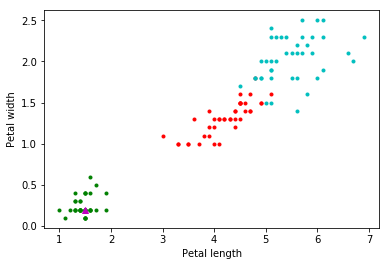

Predicted: 0. Actual: 0


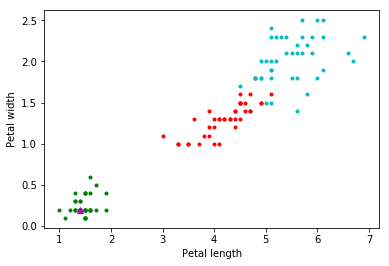

Predicted: 0. Actual: 0


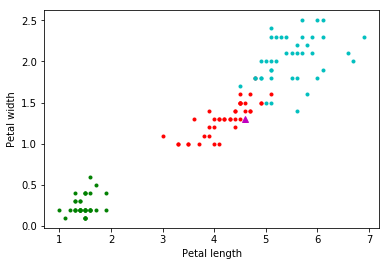

Predicted: 1. Actual: 1


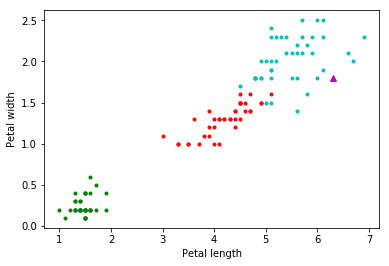

Predicted: 2. Actual: 2


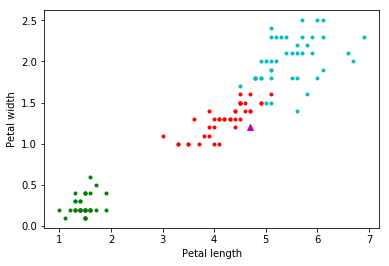

Predicted: 1. Actual: 1


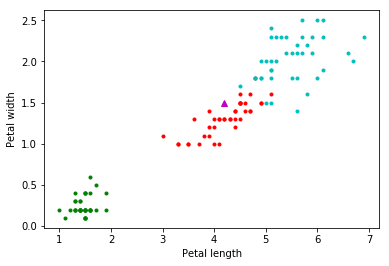

Predicted: 1. Actual: 1


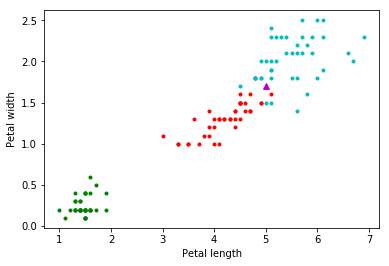

Predicted: 2. Actual: 1


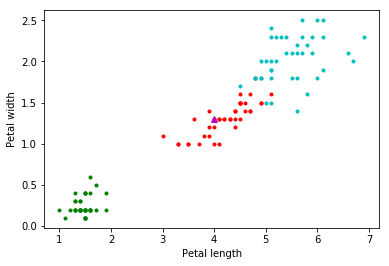

Predicted: 1. Actual: 1


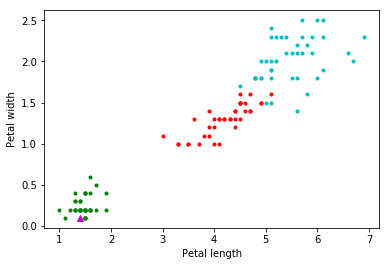

Predicted: 0. Actual: 0


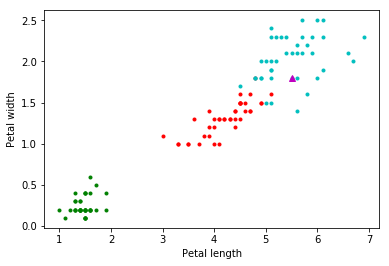

Predicted: 2. Actual: 2


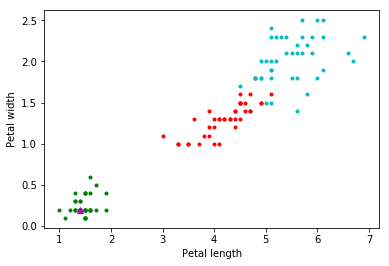

Predicted: 0. Actual: 0


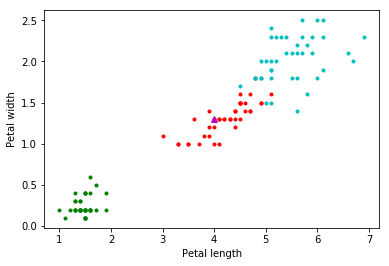

Predicted: 1. Actual: 1


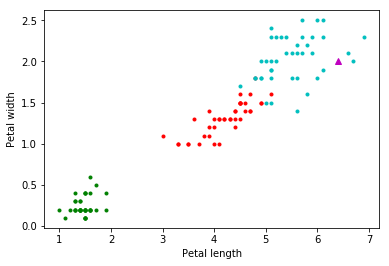

Predicted: 2. Actual: 2


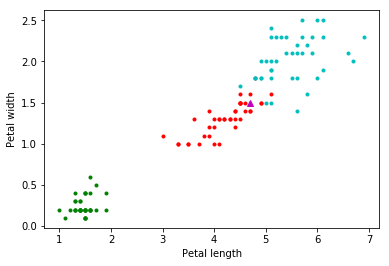

Predicted: 1. Actual: 1


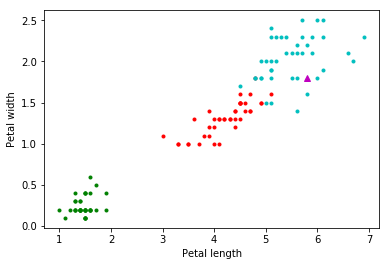

Predicted: 2. Actual: 2


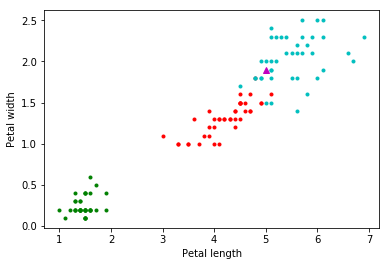

Predicted: 2. Actual: 2


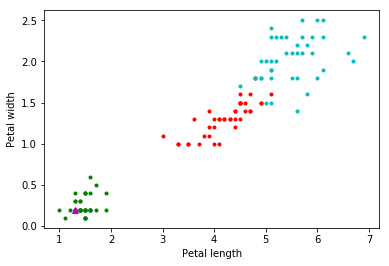

Predicted: 0. Actual: 0


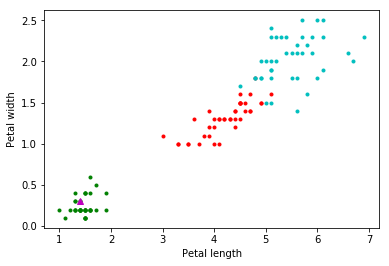

Predicted: 0. Actual: 0


In [7]:
k = 5
print("Test point is drawn using a triangle")
cf_matrix = predict(X_test, y_test, X_train, y_train, k)


In [8]:
#Confusion matrix
print(cf_matrix)

[[ 11.   0.   0.]
 [  0.   9.   1.]
 [  0.   0.   9.]]
